In [42]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import HTML

In [43]:


# Ruta de la carpeta raíz
root_folder = "/media/pablo/Kirk/T1mriqc"

# Función para extraer los valores deseados de un archivo JSON
def extract_values(json_data):
    try:
        modality = json_data["bids_meta"]["modality"]
        subject_id = json_data["bids_meta"]["subject_id"]
        cjv = json_data["cjv"]
        cnr = json_data["cnr"]
        efc = json_data["efc"]
        fber = json_data["fber"]
        return [modality, subject_id, cjv, cnr, efc, fber]
    except KeyError:
        return None

# Función para buscar archivos JSON recursivamente
def find_json_files(directory, depth=0):
    json_files = []
    for entry in os.listdir(directory):
        entry_path = os.path.join(directory, entry)
        if os.path.isfile(entry_path) and entry_path.endswith(".json"):
            json_files.append(entry_path)
        elif os.path.isdir(entry_path) and depth < 3:
            json_files.extend(find_json_files(entry_path, depth + 1))
    return json_files

# Lista para almacenar los datos extraídos
data_list = []

# Buscar archivos JSON recursivamente
json_file_paths = find_json_files(root_folder)

# Procesar los archivos JSON encontrados
for file_path in json_file_paths:
    try:
        with open(file_path, "r") as file:
            json_data = json.load(file)
            values = extract_values(json_data)
            if values:
                data_list.append(values)
    except json.JSONDecodeError:
        print(f"Error decodificando el archivo JSON: {file_path}")
    except Exception as e:
        print(f"Error procesando el archivo {file_path}: {e}")






Error decodificando el archivo JSON: /media/pablo/Kirk/T1mriqc/sub-CU048/anat/sub-CU048_run-1_T1w.json
Error decodificando el archivo JSON: /media/pablo/Kirk/T1mriqc/sub-CU034/anat/sub-CU034_run-1_T1w.json


Modality,Subject ID,CJV,CNR,EFC,FBER
T1w,CU189,0.763286,1.08472,0.4896,6156.51
T1w,CU545,0.688644,1.25184,0.5058,7300.13
T1w,MA300,0.807995,1.2209,0.6607,14780.9
T1w,AF023,0.648524,1.36627,0.5699,5968.28
T1w,AF024,0.727631,1.23088,0.5187,9637.6
T1w,AF025,0.685925,1.0168,0.5852,9281.92
T1w,AF026,0.779074,1.0944,0.5869,3890.95
T1w,AF027,0.801623,1.10101,0.5699,6435.95
T1w,AF028,0.815182,1.06321,0.538,8921.28
T1w,AF029,0.597779,1.54324,0.5382,14075.5


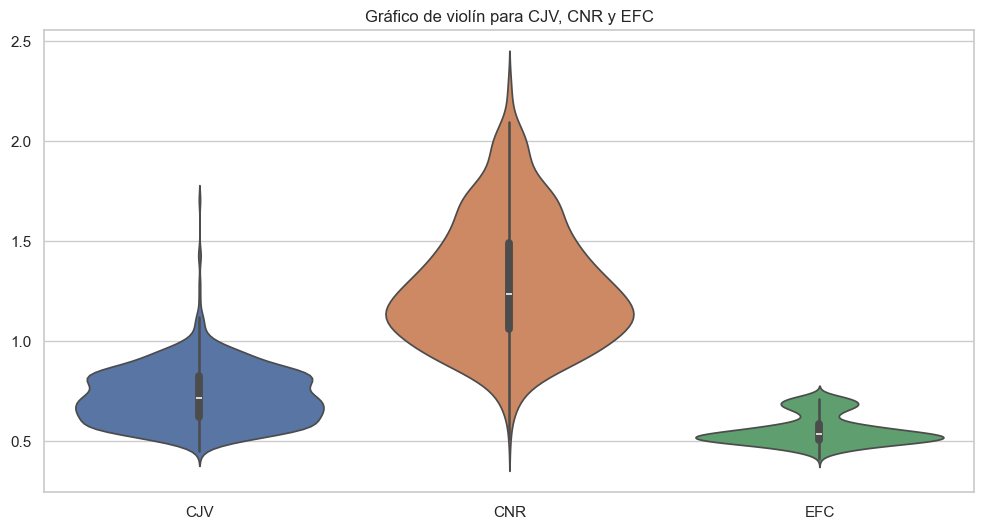

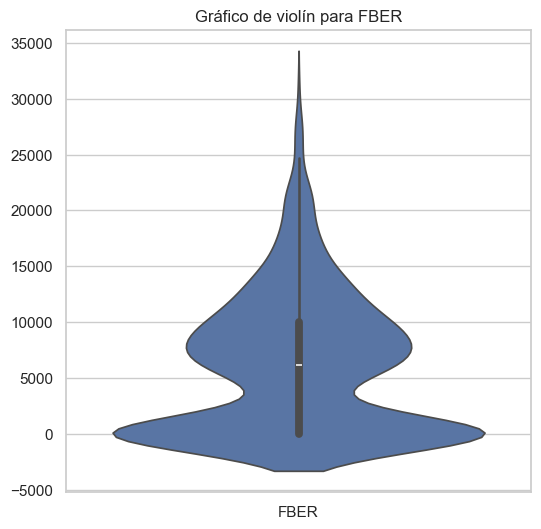

Valores extremos para CJV:
    Modality Subject ID       CJV
30       T1w    BE00171  1.705174
289      T1w    SL00284  1.135154
313      T1w    SL00368  1.287258
402      T1w    BE00194  1.438310
618      T1w      CU662  1.415060
732      T1w    SL00276  1.210297
Valores extremos para CNR:
    Modality Subject ID       CNR
151      T1w      CU505  2.164449
509      T1w      CU495  2.210860
582      T1w      CU580  2.290481
808      T1w     TA0044  2.258502
Valores extremos para EFC:
    Modality Subject ID     EFC
18       T1w    BE00132  0.7124
24       T1w    BE00142  0.7154
27       T1w    BE00164  0.7152
29       T1w    BE00167  0.7363
45       T1w    BE00128  0.7131
238      T1w      MA232  0.7094
240      T1w      MA234  0.7175
272      T1w      MA625  0.7089
288      T1w    SL00283  0.7210
292      T1w    SL00288  0.7102
293      T1w    SL00303  0.7315
294      T1w    SL00304  0.7228
297      T1w    SL00311  0.7221
387      T1w    BE00147  0.7132
388      T1w    BE00148  0.7191

In [44]:
# Crear un DataFrame de pandas
columns = ["Modality", "Subject ID", "CJV", "CNR", "EFC", "FBER"]
df = pd.DataFrame(data_list, columns=columns)

# Crear la tabla con estilo HTML
table_html = tabulate(data_list, headers=columns, tablefmt="html")
display(HTML(table_html))

# Convertir las columnas a formato numérico
df["CJV"] = pd.to_numeric(df["CJV"], errors='coerce')
df["CNR"] = pd.to_numeric(df["CNR"], errors='coerce')
df["EFC"] = pd.to_numeric(df["EFC"], errors='coerce')
df["FBER"] = pd.to_numeric(df["FBER"], errors='coerce')

# Generar gráficos de violín
sns.set(style="whitegrid")

# Crear un gráfico de violín para CJV, CNR y EFC
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[["CJV", "CNR", "EFC"]])
plt.title("Gráfico de violín para CJV, CNR y EFC")
plt.show()

# Crear un gráfico de violín para FBER
plt.figure(figsize=(6, 6))
sns.violinplot(data=df[["FBER"]])
plt.title("Gráfico de violín para FBER")
plt.show()

# Identificar y marcar valores extremos en los gráficos
for metric in ["CJV", "CNR", "EFC"]:
    q1 = df[metric].quantile(0.25)
    q3 = df[metric].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[metric] < lower_bound) | (df[metric] > upper_bound)]
    if not outliers.empty:
        print(f"Valores extremos para {metric}:")
        print(outliers[["Modality", "Subject ID", metric]])

fber_q1 = df["FBER"].quantile(0.25)
fber_q3 = df["FBER"].quantile(0.75)
fber_iqr = fber_q3 - fber_q1
fber_lower_bound = fber_q1 - 1.5 * fber_iqr
fber_upper_bound = fber_q3 + 1.5 * fber_iqr
fber_outliers = df[(df["FBER"] < fber_lower_bound) | (df["FBER"] > fber_upper_bound)]
if not fber_outliers.empty:
    print("Valores extremos para FBER:")
    print(fber_outliers[["Modality", "Subject ID", "FBER"]])

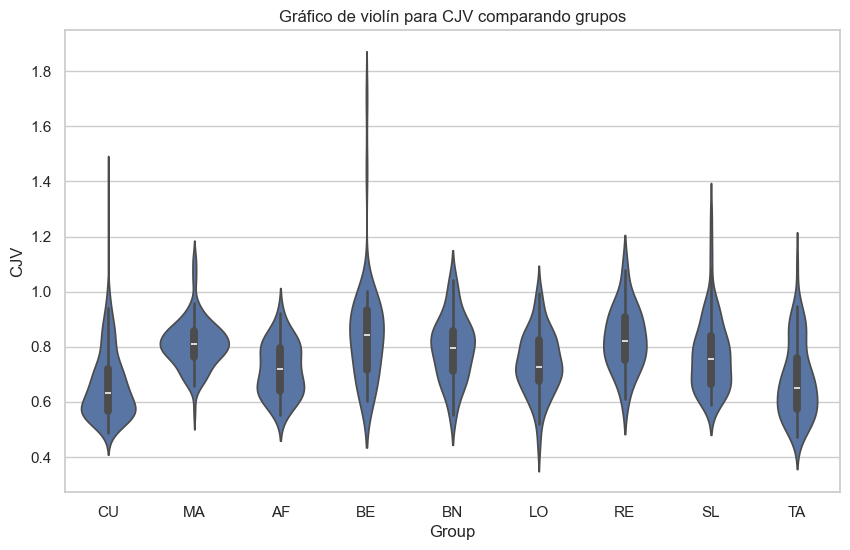

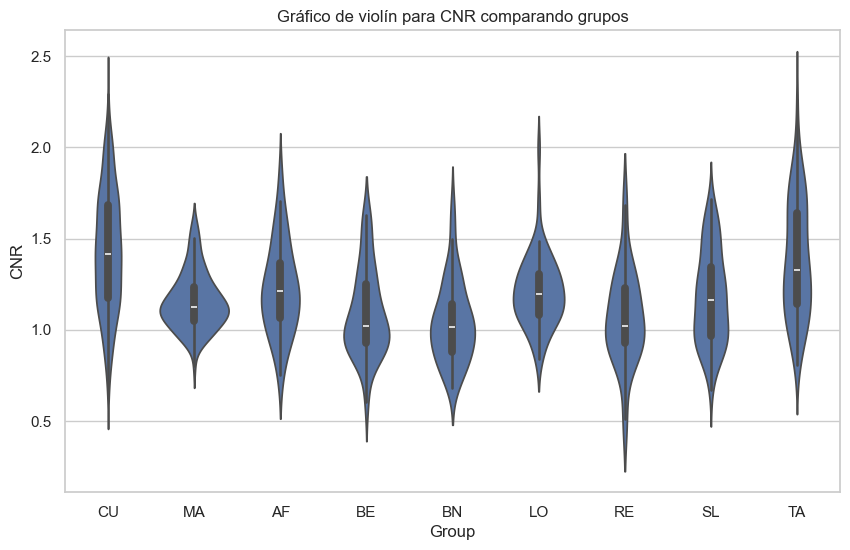

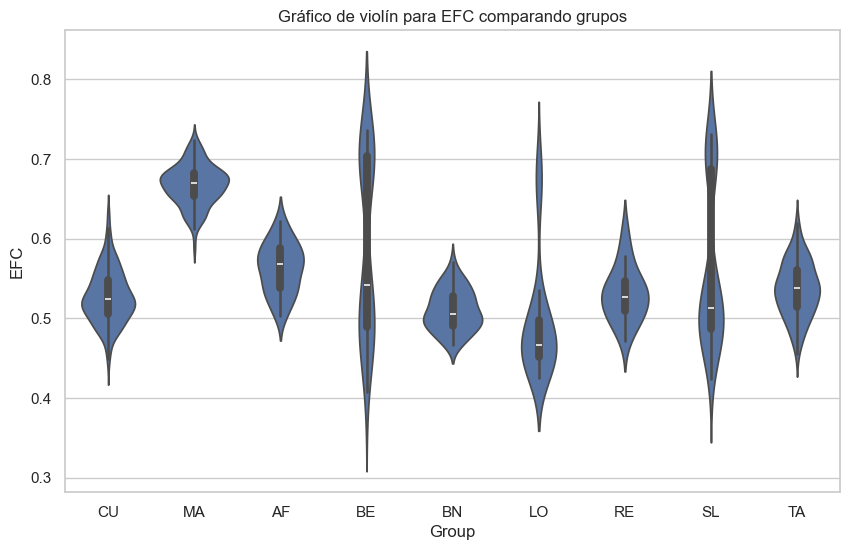

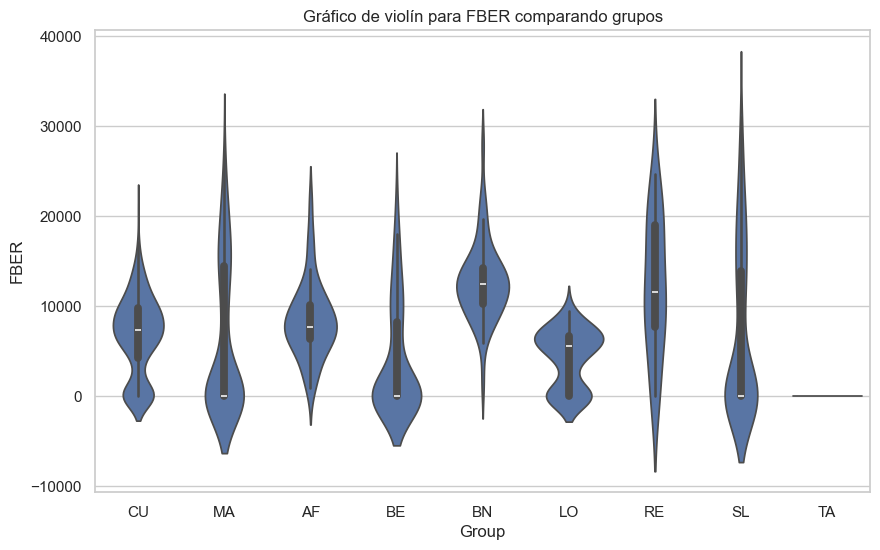

Valores extremos para CJV en el grupo CU:
    Modality Subject ID       CJV
86       T1w      CU102  0.987517
330      T1w      CU607  0.962437
543      T1w      CU299  0.992559
560      T1w      CU145  1.009036
562      T1w      CU156  0.989404
618      T1w      CU662  1.415060
Valores extremos para EFC en el grupo CU:
    Modality Subject ID     EFC
93       T1w      CU229  0.6338
535      T1w      CU538  0.6291
541      T1w      CU544  0.6207
542      T1w      CU544  0.6315
614      T1w      CU626  0.4379
Valores extremos para FBER en el grupo CU:
   Modality Subject ID        FBER
55      T1w      CU112  20785.6849
Valores extremos para CJV en el grupo MA:
    Modality Subject ID       CJV
260      T1w      MA418  1.044733
653      T1w      MA204  0.568585
698      T1w      MA607  1.048728
699      T1w      MA608  1.107559
705      T1w      MA635  1.116846
Valores extremos para CNR en el grupo MA:
    Modality Subject ID       CNR
653      T1w      MA204  1.569156
665      T1w     

In [45]:
# Convertir las columnas a formato numérico
df["CJV"] = pd.to_numeric(df["CJV"], errors='coerce')
df["CNR"] = pd.to_numeric(df["CNR"], errors='coerce')
df["EFC"] = pd.to_numeric(df["EFC"], errors='coerce')
df["FBER"] = pd.to_numeric(df["FBER"], errors='coerce')

# Extraer el grupo de las dos primeras letras de subject_id
df['Group'] = df['Subject ID'].str[:2]

# Generar gráficos de violín para cada variable por separado comparando los grupos
sns.set(style="whitegrid")

# Gráfico de violín para CJV
plt.figure(figsize=(10, 6))
sns.violinplot(x="Group", y="CJV", data=df)
plt.title("Gráfico de violín para CJV comparando grupos")
plt.show()

# Gráfico de violín para CNR
plt.figure(figsize=(10, 6))
sns.violinplot(x="Group", y="CNR", data=df)
plt.title("Gráfico de violín para CNR comparando grupos")
plt.show()

# Gráfico de violín para EFC
plt.figure(figsize=(10, 6))
sns.violinplot(x="Group", y="EFC", data=df)
plt.title("Gráfico de violín para EFC comparando grupos")
plt.show()

# Gráfico de violín para FBER
plt.figure(figsize=(10, 6))
sns.violinplot(x="Group", y="FBER", data=df)
plt.title("Gráfico de violín para FBER comparando grupos")
plt.show()

# Identificar y marcar valores extremos en los gráficos por grupo
for group in df['Group'].unique():
    group_df = df[df['Group'] == group]
    for metric in ["CJV", "CNR", "EFC"]:
        q1 = group_df[metric].quantile(0.25)
        q3 = group_df[metric].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = group_df[(group_df[metric] < lower_bound) | (group_df[metric] > upper_bound)]
        if not outliers.empty:
            print(f"Valores extremos para {metric} en el grupo {group}:")
            print(outliers[["Modality", "Subject ID", metric]])

    fber_q1 = group_df["FBER"].quantile(0.25)
    fber_q3 = group_df["FBER"].quantile(0.75)
    fber_iqr = fber_q3 - fber_q1
    fber_lower_bound = fber_q1 - 1.5 * fber_iqr
    fber_upper_bound = fber_q3 + 1.5 * fber_iqr
    fber_outliers = group_df[(group_df["FBER"] < fber_lower_bound) | (group_df["FBER"] > fber_upper_bound)]
    if not fber_outliers.empty:
        print(f"Valores extremos para FBER en el grupo {group}:")
        print(fber_outliers[["Modality", "Subject ID", "FBER"]])